# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, HTML
from IPython.display import Image as IPImage
from PIL import Image, ImageDraw, ImageTk
import os
import glob

# Universal Constants

In [2]:
g = 9.8  # acceleration due to gravity (m/s^2)

# 2D Projectile Motion

Enter initial velocity (m/s): 6
Enter launch angle (degrees): 36

Time of Flight: 0.72 seconds
Maximum Height: 0.63 m
Maximum Range: 3.49 m


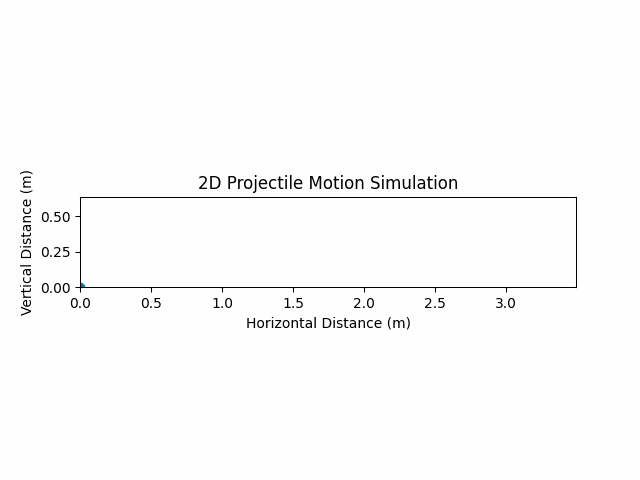

In [3]:
def projectile_motion(initial_velocity, launch_angle):
    
    horizontal_velocity = initial_velocity * np.cos(np.radians(launch_angle))
    vertical_velocity = initial_velocity * np.sin(np.radians(launch_angle))

    time_of_flight = (2 * vertical_velocity) / g
    max_height = (vertical_velocity ** 2) / (2 * g)
    max_range = horizontal_velocity * time_of_flight

    return time_of_flight, max_height, max_range

def create_gif(initial_velocity, launch_angle, filename='2d_projectile_motion.gif'):
    fig, ax = plt.subplots()

    time_of_flight, max_height, max_range = projectile_motion(initial_velocity, launch_angle)

    ax.set_xlim(0, max_range)
    ax.set_ylim(0, max_height)

    ax.set_xlabel('Horizontal Distance (m)')
    ax.set_ylabel('Vertical Distance (m)')
    ax.set_title('2D Projectile Motion Simulation')
    ax.set_aspect('equal')

    line, = ax.plot([], [], 'o-')

    num_frames = 100  # Adjust this number as needed

    def update(frame):
        g = 9.8  # acceleration due to gravity (m/s^2)

        horizontal_velocity = initial_velocity * np.cos(np.radians(launch_angle))
        vertical_velocity = initial_velocity * np.sin(np.radians(launch_angle))

        x = horizontal_velocity * frame * time_of_flight / num_frames
        y = vertical_velocity * frame * time_of_flight / num_frames - 0.5 * g * (frame * time_of_flight / num_frames)**2

        line.set_data([x], [y])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True)

    # Save each frame as a PNG file
    frames_path = 'frames/'
    os.makedirs(frames_path, exist_ok=True)
    for i, frame in enumerate(range(num_frames)):
        update(frame)
        fig.savefig(os.path.join(frames_path, f'frame_{i:03d}.png'))

    # Convert PNG frames to GIF using Pillow
    frames = [Image.open(os.path.join(frames_path, f'frame_{i:03d}.png')) for i in range(num_frames)]
    frames[0].save(filename, save_all=True, append_images=frames[1:],
                   duration=time_of_flight / num_frames * 1000, loop=0)

    # Remove the temporary frames
    for frame_path in glob.glob(os.path.join(frames_path, '*.png')):
        os.remove(frame_path)
    os.rmdir(frames_path)

    plt.close(fig)

def display_gif(filename='2d_projectile_motion.gif'):
    with open(filename, 'rb') as f:
        display(IPImage(data=f.read(), format='gif'))

def main():
    initial_velocity = float(input("Enter initial velocity (m/s): "))
    launch_angle = float(input("Enter launch angle (degrees): "))

    time_of_flight, max_height, max_range = projectile_motion(
        initial_velocity, launch_angle
    )

    print(f"\nTime of Flight: {time_of_flight:.2f} seconds")
    print(f"Maximum Height: {max_height:.2f} m")
    print(f"Maximum Range: {max_range:.2f} m")

    create_gif(initial_velocity, launch_angle)
    display_gif()

if __name__ == "__main__":
    main()

# 3D Projectile Motion

Enter initial velocity (m/s): 14
Enter horizontal launch angle (degrees): 78
Enter vertical launch angle (degrees): 32

Time of Flight: 1.48 seconds
Maximum Height: 2.69 meters
Maximum Range: 4.31 meters


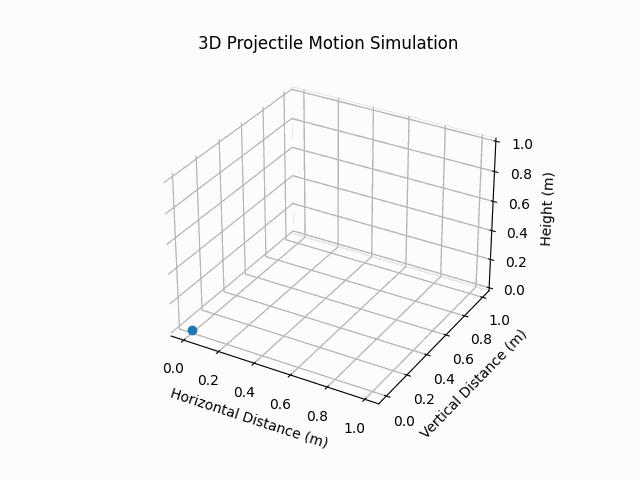

In [4]:
def projectile_motion(initial_velocity, launch_angle_horizontal, launch_angle_vertical):
    g = 9.8  # acceleration due to gravity (m/s^2)

    horizontal_velocity = initial_velocity * np.cos(np.radians(launch_angle_horizontal))
    vertical_velocity = initial_velocity * np.sin(np.radians(launch_angle_horizontal)) * np.sin(np.radians(launch_angle_vertical))

    time_of_flight = (2 * vertical_velocity) / g
    max_height = (vertical_velocity ** 2) / (2 * g)
    max_range = horizontal_velocity * time_of_flight

    return time_of_flight, max_height, max_range

def create_3d_trajectory(initial_velocity, launch_angle_horizontal, launch_angle_vertical, filename='3d_projectile_motion.gif'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    time_of_flight, max_height, max_range = projectile_motion(initial_velocity, launch_angle_horizontal, launch_angle_vertical)

    ax.set_xlabel('Horizontal Distance (m)')
    ax.set_ylabel('Vertical Distance (m)')
    ax.set_zlabel('Height (m)')
    ax.set_title('3D Projectile Motion Simulation')

    line, = ax.plot([], [], [], 'o-', label='Projectile Path')

    num_frames = 100  # Adjust this number as needed

    def update(frame):
        g = 9.8  # acceleration due to gravity (m/s^2)

        horizontal_velocity = initial_velocity * np.cos(np.radians(launch_angle_horizontal))
        vertical_velocity = initial_velocity * np.sin(np.radians(launch_angle_horizontal)) * np.sin(np.radians(launch_angle_vertical))

        x = horizontal_velocity * frame * time_of_flight / num_frames
        y = vertical_velocity * frame * time_of_flight / num_frames - 0.5 * g * (frame * time_of_flight / num_frames)**2
        z = y  # Assuming the same trajectory in the z-direction (height)

        line.set_data([x], [y])
        line.set_3d_properties([z])
        return line,

    ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True)

    # Save each frame as a PNG file
    frames_path = 'frames_3d/'
    os.makedirs(frames_path, exist_ok=True)
    for i, frame in enumerate(range(num_frames)):
        update(frame)
        fig.savefig(os.path.join(frames_path, f'frame_{i:03d}.png'))

    # Convert PNG frames to GIF using Pillow
    frames = [Image.open(os.path.join(frames_path, f'frame_{i:03d}.png')) for i in range(num_frames)]
    frames[0].save(filename, save_all=True, append_images=frames[1:],
                   duration=time_of_flight / num_frames * 1000, loop=0)

    # Remove the temporary frames
    for frame_path in glob.glob(os.path.join(frames_path, '*.png')):
        os.remove(frame_path)
    os.rmdir(frames_path)

    plt.close(fig)

def display_3d_trajectory(filename='3d_projectile_motion.gif'):
    with open(filename, 'rb') as f:
        display(IPImage(data=f.read(), format='png'))

def main():
    initial_velocity = float(input("Enter initial velocity (m/s): "))
    launch_angle_horizontal = float(input("Enter horizontal launch angle (degrees): "))
    launch_angle_vertical = float(input("Enter vertical launch angle (degrees): "))

    time_of_flight, max_height, max_range = projectile_motion(
        initial_velocity, launch_angle_horizontal, launch_angle_vertical
    )

    print(f"\nTime of Flight: {time_of_flight:.2f} seconds")
    print(f"Maximum Height: {max_height:.2f} meters")
    print(f"Maximum Range: {max_range:.2f} meters")

    create_3d_trajectory(initial_velocity, launch_angle_horizontal, launch_angle_vertical)
    display_3d_trajectory()

if __name__ == "__main__":
    main()